# Read Dataset

In [5]:
import pandas as pd
df=pd.read_csv('metadata_isic.csv').dropna(axis=1,how='all')
df.head()

,_id,name,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,...,meta.clinical.mel_type,meta.clinical.melanocytic,meta.clinical.nevus_type,meta.clinical.patient_id,meta.clinical.personal_hx_mm,meta.clinical.sex,meta.acquisition.dermoscopic_type,meta.acquisition.image_type,meta.acquisition.pixelsX,meta.acquisition.pixelsY
0,5436e3abbae478396759f0cf,ISIC_0000000,55.0,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,female,NaN,dermoscopic,1022,767
1,5436e3acbae478396759f0d1,ISIC_0000001,30.0,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,female,NaN,dermoscopic,1022,767
2,5436e3acbae478396759f0d3,ISIC_0000002,60.0,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,...,NaN,True,NaN,NaN,NaN,female,NaN,dermoscopic,1022,767
3,5436e3acbae478396759f0d5,ISIC_0000003,30.0,upper extremity,benign,NaN,nevus,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,male,NaN,dermoscopic,1022,767
4,5436e3acbae478396759f0d7,ISIC_0000004,80.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,...,NaN,True,NaN,NaN,NaN,male,NaN,dermoscopic,1022,767


# Automated EDA

## Pandas Profiling

Documentation: https://pypi.org/project/pandas-profiling/

In [2]:
from pandas_profiling import ProfileReport

In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("eda_preprocessing_report.html")

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

C:\Users\aparg\anaconda3\envs\cancer\lib\site-packages\pandas_profiling\model\correlations.py:152: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## AutoViz

Documentation: https://pypi.org/project/autoviz/

Shape of your Data Set loaded: (69445, 22)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  8
    22 Predictors classified...
        This does not include the Target column(s)
        12 variables removed since they were ID or low-information variables
    List of variables removed: ['_id', 'name', 'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.family_hx_mm', 'meta.clinical.mel_class', 'meta.clinical.mel_thick_mm', 'meta.clinical.mel_type', 'meta.clinical.nevus_type', 'meta.clin

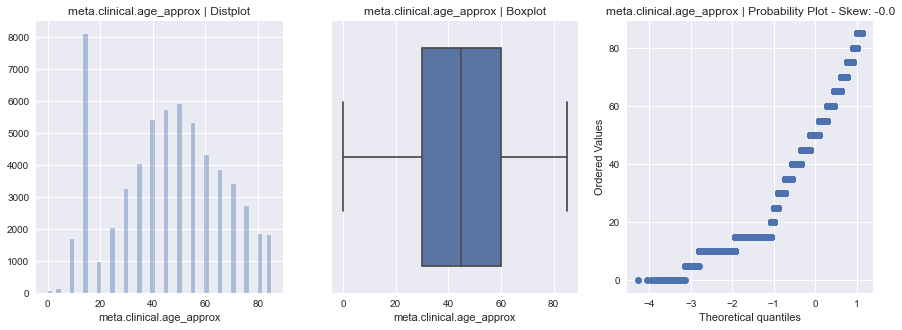

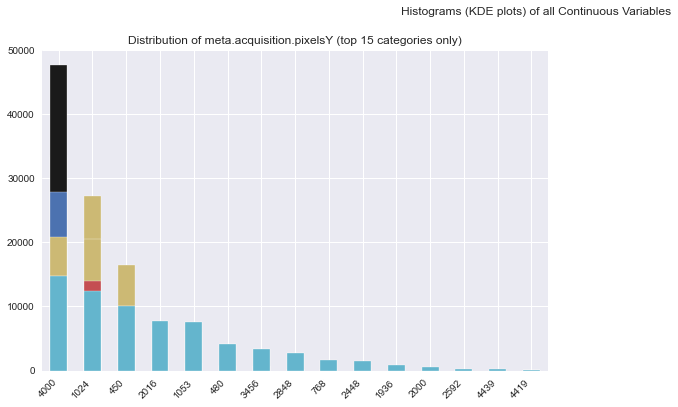

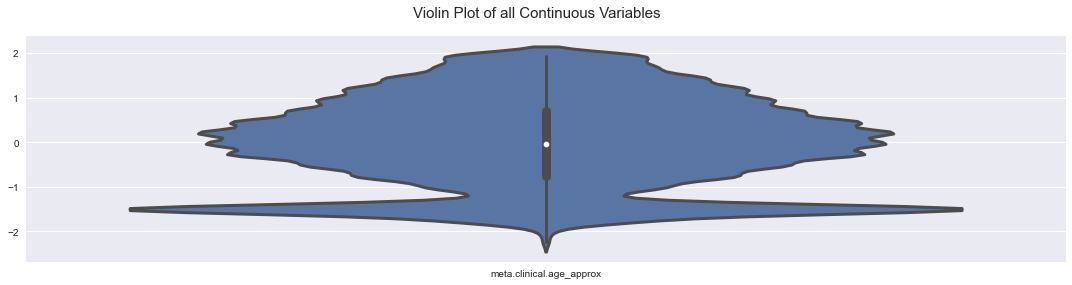

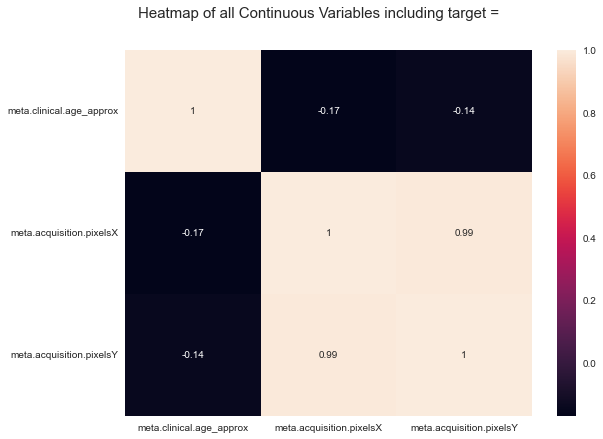

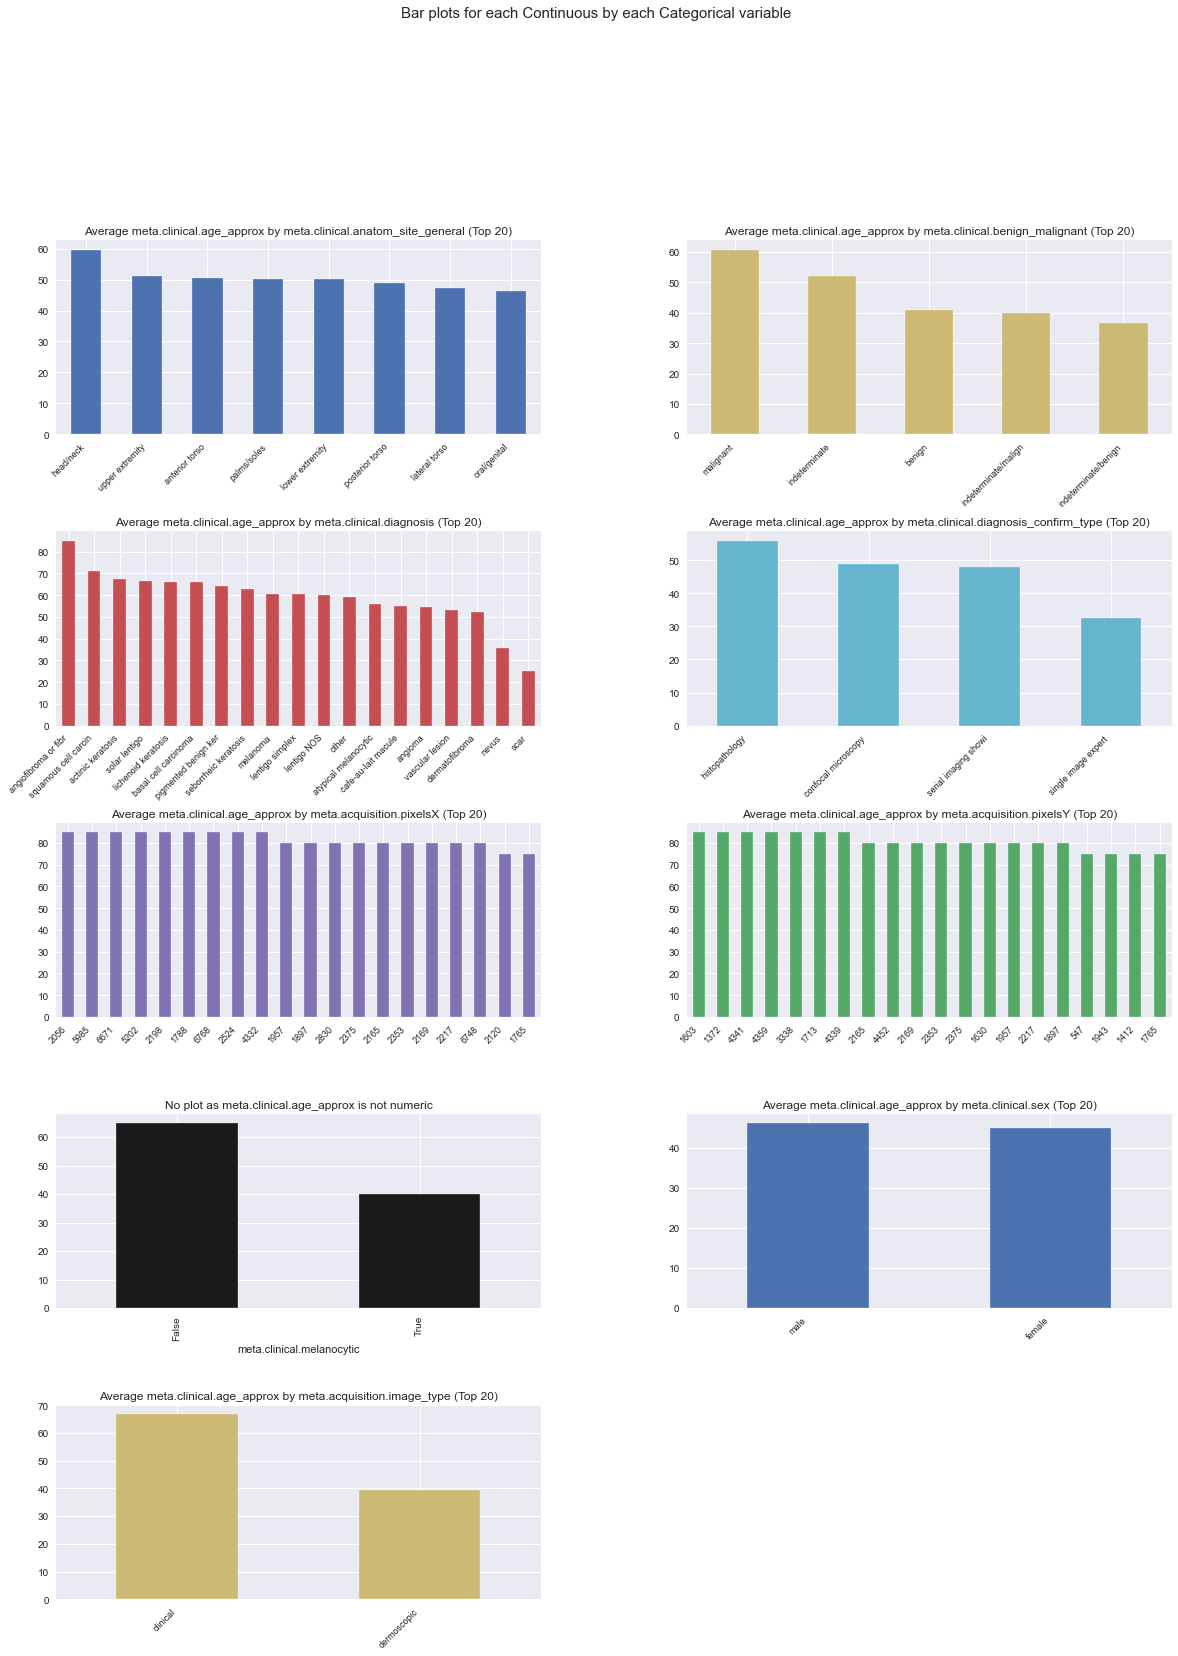

Time to run AutoViz (in seconds) = 2.854

 ###################### VISUALIZATION Completed ########################


In [7]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
sep = ","
dft = AV.AutoViz(
    filename='',
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Univariate Analysis for columns with <40% missing values:
* 68.7% cases are benign, 8.2% are malignant and the rest are indeterminate/missing.
* lower extremity, anterior torso, posterior torso, upper extremity, head/neck anatomical sites constitute of 64.2% of total cases. Lesion on other anatomical sites is uncommon.
* More than 50% of the times the clinical diagnosis is nevus.
* Most of the given lesions are melanocytic.
* Ratio of male and female cases is approximately same.